In [1]:
import acquire

In [2]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = acquire.get_all_data(use_cache=True)

In [4]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


1.Convert date column to datetime format.

In [5]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

2. Plot the distribution of sale_amount and item_price.

Text(0.5, 1.0, 'The distribution of sale amount over time')

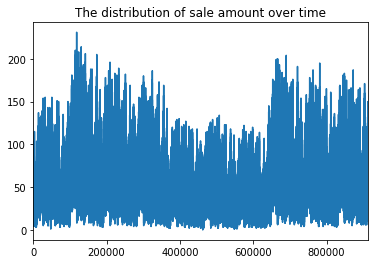

In [6]:
df.sale_amount.plot().set_title('The distribution of sale amount over time')

Text(0.5, 1.0, 'The distribution of item price over time')

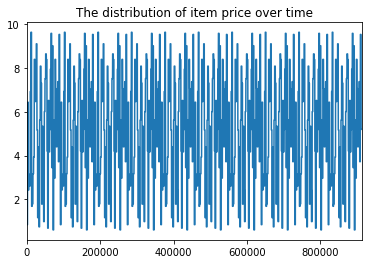

In [7]:
df.item_price.plot().set_title('The distribution of item price over time')

3.Set the index to be the datetime variable.

In [8]:
df = df.sort_values('sale_date').set_index('sale_date')

In [9]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


4.Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [10]:
df["month"] = df.index.month_name()

In [11]:
df["day_of_week"] = df.index.day_name()

In [13]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday


5.Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
df['sales_total'] = df.sale_amount * df.item_price

In [15]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92


6.Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [17]:
sales_total = df.resample("D")[['sales_total']].sum()
sales_total['sales_differences'] = sales_sum['sales_total'].diff()
sales_total.head(5)

,sales_total,sales_differences
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12


7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [19]:
# def prep_sales_data():
#     df = acquire.get_all_data(use_cache=True)
#     df['sale_date'] = pd.to_datetime(df['sale_date'])
#     df.sale_amount.plot().set_title('The distribution of sale amount over time')
#     df.item_price.plot().set_title('The distribution of item price over time')
#     df = df.sort_values('sale_date').set_index('sale_date')
#     df["month"] = df.index.month_name()
#     df["day_of_week"] = df.index.day_name()
#     df['sales_total'] = df.sale_amount * df.item_price
#     return df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,January,Tuesday,30.16
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231,January,Tuesday,308.48
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201,January,Tuesday,197.55
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201,January,Tuesday,25.16


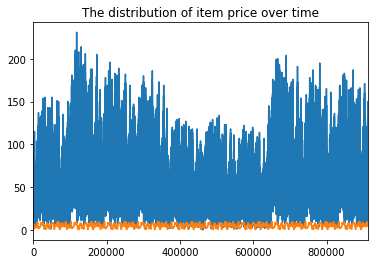

In [20]:
prep_sales_data()

In [21]:
# def diff_between_sales():
#     sales_total = df.resample("D")[['sales_total']].sum()
#     sales_total['sales_differences'] = sales_sum['sales_total'].diff()
#     return sales_total.head()

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:


In [53]:
ops = acquire.get_opsd_data()

In [54]:
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [55]:
ops.shape

(4383, 5)

In [56]:
ops.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [57]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


1. Convert date column to datetime format.

In [58]:
ops['Date'] = pd.to_datetime(ops['Date'])

In [59]:
ops.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


2. Plot the distribution of each of your variables.

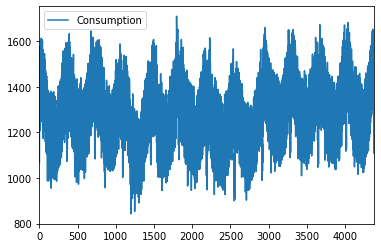

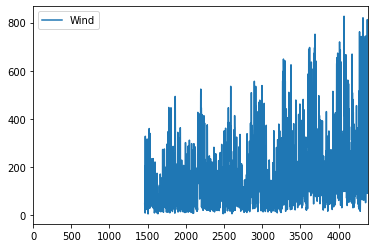

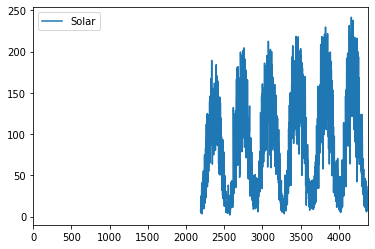

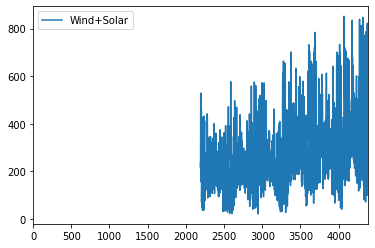

In [60]:
ops[['Consumption']].plot()
ops[['Wind']].plot()
ops[['Solar']].plot()
ops[['Wind+Solar']].plot()

3. Set the index to be the datetime variable.

In [61]:
ops = ops.sort_values('Date').set_index('Date')

In [62]:
ops.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


4. Add a month and a year column to your dataframe.

In [63]:
ops['month'] = ops.index.month_name()

In [65]:
ops['year'] = ops.index.year()

TypeError: 'Int64Index' object is not callable